# Experiment and path specification

In [7]:
# Specify the experiment for analysis
experiment='xppl2816'
runNumber = 74

# Set the installation and output path
import os
os.environ['INSTALLPATH']='/reg/neh/home4/mrware/TRXS'
os.environ['OUTPUTPATH']= '/reg/d/psdm/%s/%s/scratch' % (experiment[0:3],experiment)

# Import Libraries

In [8]:
# Magic iPython command to enable plotting
%matplotlib inline

# Load in the pythonBatchMagic library
import sys
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/pythonBatchMagic')
from pythonBatchMagic import *
# Determine current user
currentUser, error = unixCMD("echo $USER")
print(currentUser)
os.environ['RESULTSPATH']= ('/reg/d/psdm/%s/%s/res/%s' % (experiment[0:3],experiment,currentUser)).strip()
if not os.path.exists(os.environ['RESULTSPATH']):
    os.mkdir(os.environ['RESULTSPATH'])

mrware



# Leveraging the batch queue to quickly grab point data

## Loading libraries

In [9]:
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/LCLS')
from LCLSdefault import *

sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/mattsTools')
from picklez import *

# Load in the get data library
from dataAnalysis import *

# Load in the batch library for lcls
from lclsBatch import *

# Load timebinned CSPAD

In [10]:
timebins = np.load(os.environ['RESULTSPATH']+'/timebins-run-%d.npy' % runNumber )
CSPAD = np.load(os.environ['RESULTSPATH']+'/CSPAD-run-%d.npy' % runNumber)
variance = np.load(os.environ['RESULTSPATH']+'/variance-run-%d.npy' % runNumber)
counts = np.load(os.environ['RESULTSPATH']+'/counts-run-%d.npy' % runNumber)


# Plot CSPAD

In [11]:
CSPAD.shape

(32, 185, 388, 117)

0.1
nan


/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.3.9/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


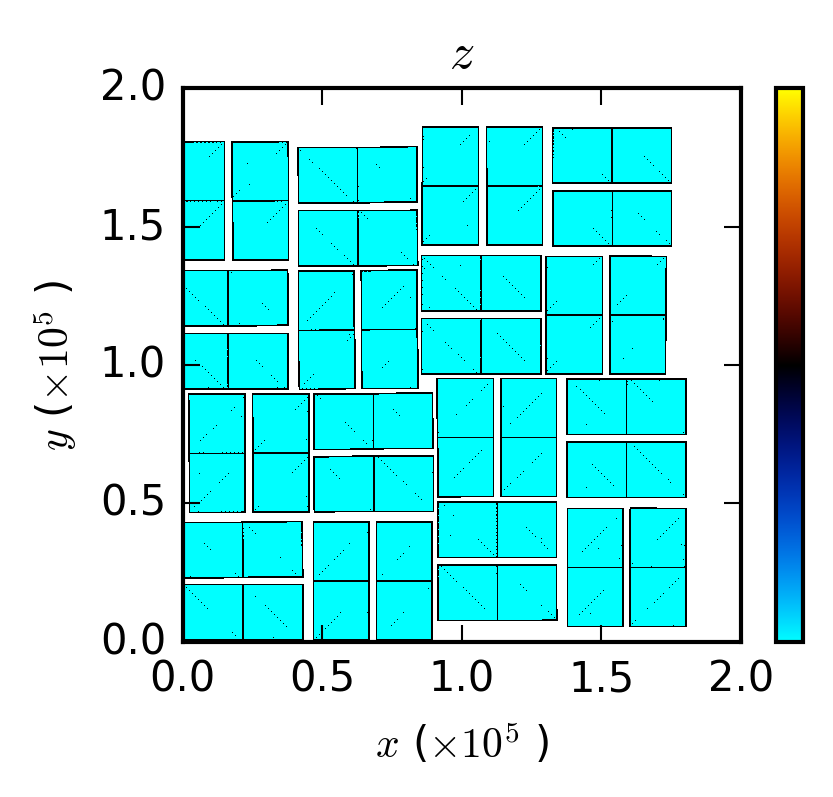

In [12]:
from IPython.display import clear_output
from plotStyles import *

def plotCSPAD( cspad , x , y, cspadMask=None, zLims = None, divergent=False ):
    figOpts = {'xLims':[0,2e5],'yLims':[0,2e5],'divergent':divergent, 'xIn':3, 'yIn':3*11.5/14.5}
    
    if zLims is not None:
        figOpts['zLims'] = zLims
    
    for iTile in range(32):
    
        if cspadMask is not None:
            cspadTile = cspad[iTile,:,:]
            tileMask = ~cspadMask[iTile,:,:]
            cspadTile[tileMask] = 0
        
        if iTile == 0:
            newFigure = True
        else:
            newFigure = False
            
        clear_output()
        colorPlot( x[iTile,:,:], y[iTile,:,:], cspadTile , newFigure=newFigure, **figOpts);


x,y = CSPADgeometry()
cspadMask = createMask().astype(bool)
print(cspadMask.shape)


CSPADbinned = CSPAD
        
# plotCSPAD( cspadMask, x , y , cspadMask=cspadMask, divergent=True )
plotCSPAD( CSPADbinned[:,:,:,2]-CSPADbinned[:,:,:,1], x , y , cspadMask=cspadMask, divergent=True )


print(sumCSPAD(CSPAD))

# ROI analysis

Ignoring undefined input variable ...
[]


<Container object of 3 artists>

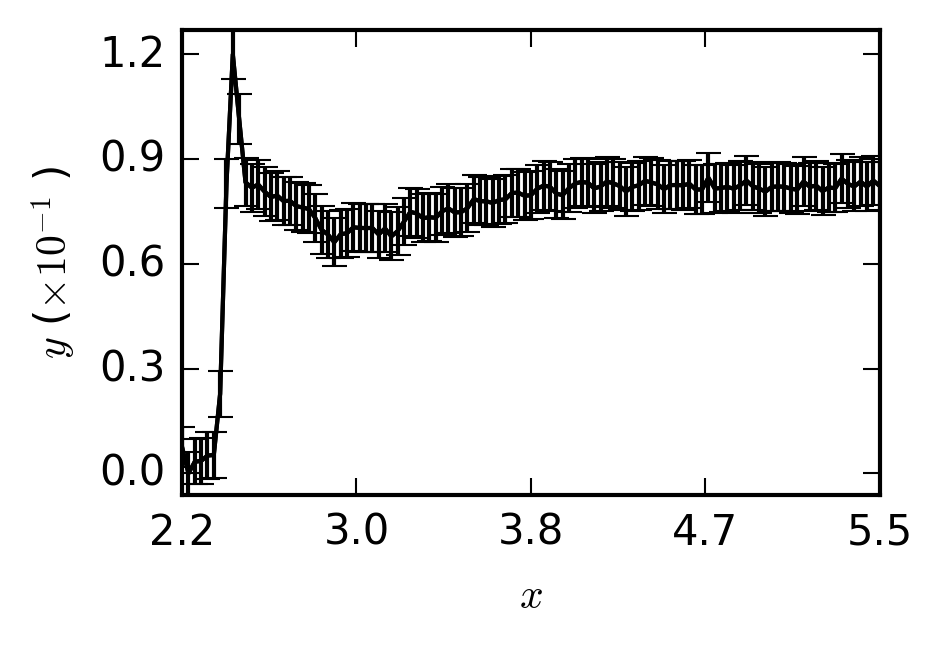

In [13]:
def roiSummed( x0, y0, dx, dy, x, y, image ):
    idx = ( x0 < x ) & ( (x0+dx) > x ) & ( y0 < y ) & ( (y0+dy) > y )
    return np.sum( image[idx , :] , 0 )

roi1 = roiSummed( 6e4, 11e4, 1e4, 1e4, x, y, CSPAD )
errroi1 = roiSummed( 6e4, 11e4, 1e4, 1e4, x, y, variance )
roi2 = roiSummed( 11e4, 6e4, 1e4, 1e4, x, y, CSPAD )
errroi2 = roiSummed( 11e4, 6e4, 1e4, 1e4, x, y, variance )

errorratio = 1/roi2*np.sqrt(errroi1)+roi1/roi2**2*np.sqrt(errroi2)

ratio = roi1/roi2
plotme = ratio[~np.isnan(ratio)]-ratio[~np.isnan(ratio)].min()
linePlot( timebins[~np.isnan(ratio)], plotme , newFigure = True)

plt.errorbar( timebins[~np.isnan(ratio)], plotme, yerr = errorratio[~np.isnan(ratio)] )

Ignoring undefined input variable ...
[]


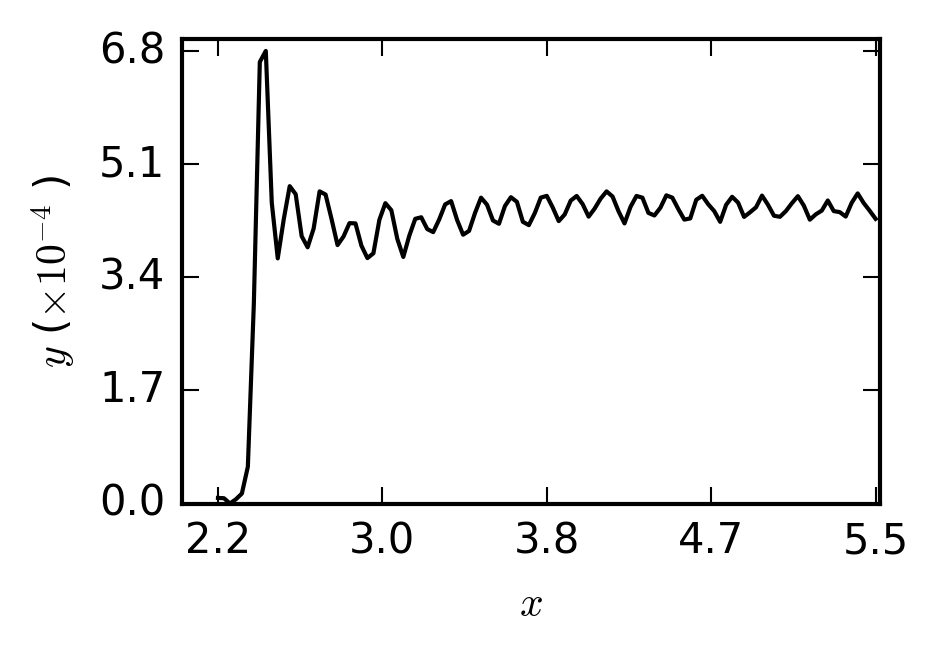

In [15]:
def roiSummed( x0, y0, dx, dy, x, y, image ):
    idx = ( x0 < x ) & ( (x0+dx) > x ) & ( y0 < y ) & ( (y0+dy) > y )
    return np.sum( image[idx , :] , 0 )

roi1 = roiSummed( 6e4, 11e4, 1e4, 1e4, x, y, CSPAD )
errroi1 = roiSummed( 6e4, 11e4, 1e4, 1e4, x, y, variance )
roi2 = roiSummed( 11e4, 6e4, 1e4, 1e4, x, y, CSPAD )
errroi2 = roiSummed( 11e4, 6e4, 1e4, 1e4, x, y, variance )

errorratio = 1/roi2*np.sqrt(errroi1)+roi1/roi2**2*np.sqrt(errroi2)

ratio = roi1
plotme = ratio[~np.isnan(ratio)]-ratio[~np.isnan(ratio)].min()
linePlot( timebins[~np.isnan(ratio)], plotme , newFigure = True)

# plt.errorbar( timebins[~np.isnan(ratio)], plotme, yerr = errorratio[~np.isnan(ratio)] )